# Cat Classifier
This is a **logistic regression implementation** with **neural networks** as a part of learning **Deep Learning Specialization** with **Andrew Ng**. 
Here we will build a classifier to recognize cats.

## Problem Statement
In this problem we have been given a dataset("data.h5") which contains:

- Training Set of **m_train** images and they have been labeled as cat or non-cat with their **y** values being either 1 or 0 respectively.

- Similarly for test set we have **m_test** images labeled as cat ot non-cat.

- Dimension of each image is **num_px * num_px * 3** where 3 is for the 3 channels (RGB)

I have to build a simple image recognition algorithm that can correctly classify pictures as cat or non-cat.

## Importing Libraries

- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

The **%matplotlib inline** magic command is used in Jupyter Notebooks to display matplotlib plots directly within the notebook. This command ensures that any plots created using matplotlib are rendered within the notebook cells, instead of in a separate window.

In [3]:
%matplotlib inline

## Loading Dataset
Here I will be loading the data set. The format of the data is in **.h5**
The file extension **.h5** is associated with files in the **Hierarchical Data Format version 5 (HDF5)**. **HDF5** is a file format and set of tools for managing complex data. It is designed to store and organize large amounts of data, enabling efficient storage, retrieval, and analysis.
**HDF5** is commonly used in scientific computing and machine learning for storing large datasets and model weights. In Python, the **h5py** library is frequently used to interact with **HDF5** files.

I have added **orig** infront of the variable names because they will go through some preprocessing before being used in the model training.
The shape of **train_set_x_orig** is **(209, 64, 64, 3)** indicating that there are 209 images of cats and each of them have a dimension of **64 x 64** so the value of **num_px** is 64.
The shape of **train_set_y_orig** originally is **(209,)** which is a rank 1 array that's neither a row vector or a column vector. It needs to be changed so that it's of the form **(1, 209)**

In [4]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

**train_set_x_orig** and **test_set_x_orig** are just arrays representing the image. Let's try to visualize one particular image.

y = 0, it's a 'non-cat' picture.


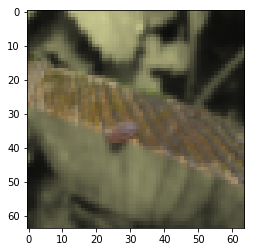

In [5]:
# Example
index = 12
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Most of the bugs that come up in machine learning comes generally from Matrix/Vector dimensions mismatches. In the below cell I have stated the various information about out dataset.

In [6]:
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


At this stage, I will try to do some alterations to our **train_set_x_orig** and **test_set_x_orig**.
They are currently of dimensions **(209, 64, 64, 3)** and **(50, 64, 64, 3)** signifying that there are **209 training** and **50 test** images of **dimension (64, 64, 3)**. I need to flatten each image so that it gets transformed from **(64, 64, 3)** to **(64x64x3, 1)**. After that I need to create a Matrix where each column represents an image. So the dimension of that Matrix would be **(64x64x3, 209)** for **train** images and **(64x64x3, 50)** for **test** images.

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
- train_set_x_orig.shape[0] refers to m, the number of examples.
- The reshape function changes the shape of train_set_x_orig to (m, height * width * channels).
- Here, -1 is used to infer the size of the second dimension. It means "compute this dimension automatically based on the original size".
- This effectively flattens each image (of shape (height, width, channels)) into a single vector of size height * width * channels.
- The .T attribute transposes the array.
- The shape changes from (m, height * width * channels) to (height * width * channels, m).
- Each column now represents a flattened image, and each row represents a pixel across all images.

In [7]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


Now as the images are colored images and have their RGB values defined in the range of (0 ,255), we will have to standardize our dataset.

In [8]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## 3 - General Architecture of the learning algorithm ##

We have to design the algorithm now. Building a Logistic Regression, using a Neural Network mindset. Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
- We have to initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

## 4 - Building parts of our learning algorithm.

The main steps of building a Neural Network are:-
1. Builing the model structure (number of input features, hidden layers, activation functions etc)
2. Then we need to initialize the model's parameters
3. Loop:
- In the loop, we need to calculate current loss (forward propagation)
- Then need to calculate current gradient (backward propagation)
- Update parameters (gradient descent)
We often build all these seperately and integrate them into one function wich we call as model().

### 4.1 - Helper functions

Implementation of `sigmoid()` function. We need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions.

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


### 4.2 - Initializing parameters

Implementing parameter initialization in the cell below. We have to initialize **w** and **b**
Implementation of **Xavier Initialization**
<img src="images/Xavier or Glorot Initialization.png" style="width:850px;height:400px;">

In [11]:
def initialize_with_random_values(dim):
    w = np.random.randn(dim, 1) * np.sqrt(1 / dim)
    b = 0;
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### 4.3 - Forward and Backward propagation

Now that our parameters are initialized, we can do the "forward" and "backward" propagation steps for learning the parameters.

Forward Propagation:
- We get X
- We compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- We calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas that we will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [12]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    #Forward Propagation
    A = sigmoid(np.dot(w.T , X) + b)
    J = np.sum(-Y*np.log(A) - (1-Y)*(np.log(1-A)))/m
    #Backward Propagation
    dw = np.dot(X , (A-Y).T)/m
    db = (np.sum(A-Y))/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    J = np.squeeze(J)
    assert(J.shape == ())
    gradients = {"dw": dw,
             "db": db}
    return gradients, J

### 4.4 - Optimization
- We have initialized our parameters.
- We are also able to compute a cost function and its gradient.
- Now, we want to update the parameters using gradient descent.

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    costs_after_every_100_iterations = []
    for i in range(num_iterations):
        gradients, J = propagate(w, b, X, Y)
        # Retrieve derivatives from gradients
        dw = gradients["dw"]
        db = gradients["db"]
        # Update Rules
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        # Recording the costs
        if i % 100 == 0:
            costs_after_every_100_iterations.append(J)
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost)) 
    parameters = {"w": w,
              "b": b}
    gradients = {"dw": dw,
             "db": db}
    return parameters, gradients, costs_after_every_100_iterations

Now we will implement the predit function that will give us Y_prediction
1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. 

In [14]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    A = sigmoid(np.dot(w.T , X) + b)
    Y_prediction = (A >= 0.5) * 1.0
    return Y_prediction

## 5 - Merge all functions into a model ##

Now we will see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

In [15]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialization
    w , b = initialize_with_random_values(X_train.shape[0])
    # Gradient Descent
    parameters, gradients, J = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    # Learned Parameters
    w = parameters["w"]
    b = parameters["b"]
    # Predicting the results on X_train and X_test
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # Printing Accuracy
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": J,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

Now we will train our model.

In [16]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


## 6 - Further Analysis


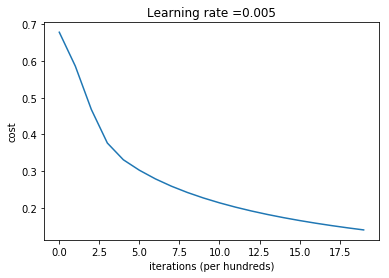

In [50]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Experimenting with different learning rates

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 90.43062200956938 %
test accuracy: 62.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.89952153110048 %
test accuracy: 42.00000000000001 %

-------------------------------------------------------



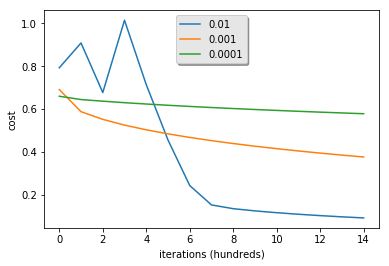

In [51]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  


y = 0.0, your algorithm predicts a "non-cat" picture.


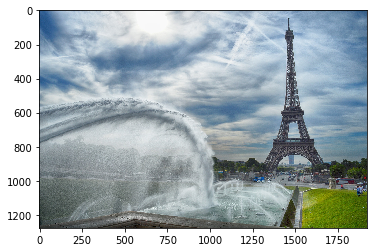

In [17]:
my_image = "my_image.jpg"  
# Preprocess the image to fit our algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", our algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")